In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
import glob
import time
import cv2
import os
%matplotlib inline

In [2]:
dir_komet = "./dataset/komet/*.jpg"
dir_maanfish = "./dataset/maan/*.jpg"
dir_molly = "./dataset/molly/*.jpg"
dir_redfine = "./dataset/redfine/*.jpg"
dir_zebra = "./dataset/zebra/*.jpg"
 
files = glob.glob(dir_komet) 
komet = []
for f1 in files: 
 img = cv2.imread(f1) 
 komet.append(img) 
files = glob.glob(dir_maanfish) 
maanfish = []
for f1 in files: 
 img = cv2.imread(f1) 
 maanfish.append(img) 
files = glob.glob(dir_molly) 
molly = []
for f1 in files: 
 img = cv2.imread(f1) 
 molly.append(img) 
files = glob.glob(dir_redfine) 
redfine = []
for f1 in files: 
 img = cv2.imread(f1) 
 redfine.append(img) 
files = glob.glob(dir_zebra) 
zebra = []
for f1 in files: 
 img = cv2.imread(f1) 
 zebra.append(img) 
 
# Panggil Dataset (Data Uji)
dir_komet_uji = "./dataset/uji/komet/*.jpg"
dir_maanfish_uji = "./dataset/uji/maan/*.jpg"
dir_molly_uji = "./dataset/uji/molly/*.jpg"
dir_redfine_uji = "./dataset/uji/redfine/*.jpg"
dir_zebra_uji = "./dataset/uji/zebra/*.jpg"
files = glob.glob(dir_komet_uji) 
komet_uji = []
for f1 in files: 
 img = cv2.imread(f1) 
 komet_uji.append(img)
files = glob.glob(dir_maanfish_uji) 
maanfish_uji = []
for f1 in files: 
 img = cv2.imread(f1) 
 maanfish_uji.append(img) 
files = glob.glob(dir_molly_uji) 
molly_uji = []
for f1 in files: 
 img = cv2.imread(f1) 
 molly_uji.append(img) 
files = glob.glob(dir_redfine_uji) 
redfine_uji = []
for f1 in files: 
 img = cv2.imread(f1) 
 redfine_uji.append(img) 
files = glob.glob(dir_zebra_uji) 
zebra_uji = []
for f1 in files: 
 img = cv2.imread(f1) 
 zebra_uji.append(img) 


In [3]:
[np.shape(komet), np.shape(maanfish), np.shape(redfine),np.shape(molly), np.shape(zebra)]

[(5, 300, 400, 3),
 (5, 300, 400, 3),
 (5, 300, 400, 3),
 (5, 300, 400, 3),
 (5, 300, 400, 3)]

In [4]:
[np.shape(komet_uji), np.shape(maanfish_uji), np.shape(redfine_uji), np.shape(molly_uji), np.shape(zebra_uji)]

[(2, 300, 400, 3),
 (2, 300, 400, 3),
 (2, 300, 400, 3),
 (2, 300, 400, 3),
 (2, 300, 400, 3)]

In [5]:
X = np.vstack((komet, maanfish, molly, redfine, zebra)).astype(np.float32)

In [6]:
X.shape

(25, 300, 400, 3)

In [7]:
print(X)

[[[[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  ...

  [[ 13.  13.  13.]
   [234. 234. 234.]
   [254. 254. 254.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[ 13.  13.  13.]
   [234. 234. 234.]
   [254. 254. 254.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[ 13.  13.  13.]
   [234. 234. 234.]
   [254. 254. 254.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]]


 [[[255. 194. 119.]
   [254. 192. 122.]
   [222. 178. 125.]
   ...
   [219. 181. 117.]
   [247. 192. 119.]
   [254. 194. 118.]]

  [[238. 190. 118.]
   [161. 144. 105.]
   [ 55.  83.  94.]
   ...
   [ 61.  83.  65.]
 

In [8]:
X = X / 255.0

In [9]:
X.shape

(25, 300, 400, 3)

In [10]:
len(komet)

5

In [11]:
print(X)

[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[0.05098039 0.05098039 0.05098039]
   [0.91764706 0.91764706 0.91764706]
   [0.99607843 0.99607843 0.99607843]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.05098039 0.05098039 0.05098039]
   [0.9

In [12]:
X_uji=np.vstack((komet_uji, maanfish_uji, molly_uji, redfine_uji, zebra_uji)).astype(np.float32)

In [13]:
X_uji.shape

(10, 300, 400, 3)

In [14]:
X_uji = X_uji/255.0

In [15]:
print(X_uji)

[[[[0.08627451 0.38431373 0.10196079]
   [0.13725491 0.4627451  0.16862746]
   [0.18431373 0.54901963 0.23137255]
   ...
   [0.05098039 0.07843138 0.02745098]
   [0.0627451  0.09019608 0.03921569]
   [0.07450981 0.10196079 0.05098039]]

  [[0.01568628 0.28235295 0.00392157]
   [0.04705882 0.34117648 0.05098039]
   [0.07843138 0.41960785 0.10588235]
   ...
   [0.04313726 0.07058824 0.01960784]
   [0.05098039 0.07843138 0.02745098]
   [0.05882353 0.08627451 0.03529412]]

  [[0.05882353 0.27058825 0.        ]
   [0.04705882 0.28627452 0.        ]
   [0.03921569 0.3137255  0.01176471]
   ...
   [0.02745098 0.05490196 0.00392157]
   [0.03529412 0.0627451  0.01176471]
   [0.04313726 0.07058824 0.01960784]]

  ...

  [[0.15686275 0.21568628 0.2       ]
   [0.18039216 0.23921569 0.22352941]
   [0.27450982 0.3372549  0.30980393]
   ...
   [0.         0.04313726 0.01960784]
   [0.         0.01568628 0.00392157]
   [0.         0.02745098 0.01568628]]

  [[0.01960784 0.08627451 0.07058824]
   [0.0

In [16]:
print(X_uji)

[[[[0.08627451 0.38431373 0.10196079]
   [0.13725491 0.4627451  0.16862746]
   [0.18431373 0.54901963 0.23137255]
   ...
   [0.05098039 0.07843138 0.02745098]
   [0.0627451  0.09019608 0.03921569]
   [0.07450981 0.10196079 0.05098039]]

  [[0.01568628 0.28235295 0.00392157]
   [0.04705882 0.34117648 0.05098039]
   [0.07843138 0.41960785 0.10588235]
   ...
   [0.04313726 0.07058824 0.01960784]
   [0.05098039 0.07843138 0.02745098]
   [0.05882353 0.08627451 0.03529412]]

  [[0.05882353 0.27058825 0.        ]
   [0.04705882 0.28627452 0.        ]
   [0.03921569 0.3137255  0.01176471]
   ...
   [0.02745098 0.05490196 0.00392157]
   [0.03529412 0.0627451  0.01176471]
   [0.04313726 0.07058824 0.01960784]]

  ...

  [[0.15686275 0.21568628 0.2       ]
   [0.18039216 0.23921569 0.22352941]
   [0.27450982 0.3372549  0.30980393]
   ...
   [0.         0.04313726 0.01960784]
   [0.         0.01568628 0.00392157]
   [0.         0.02745098 0.01568628]]

  [[0.01960784 0.08627451 0.07058824]
   [0.0

In [17]:
label_komet = np.array([0, 0, 0, 0, 0]) 
label_maanfish = np.array([1, 1, 1, 1, 1])
label_molly = np.array([2, 2, 2, 2, 2]) 
label_redfine = np.array([3, 3, 3, 3, 3])
label_zebra = np.array([4, 4, 4, 4, 4])

In [18]:
[np.shape(label_komet), np.shape(label_maanfish), np.shape(label_molly), np.shape(label_redfine), np.shape(label_zebra)]

[(5,), (5,), (5,), (5,), (5,)]

In [19]:
y = np.hstack((label_komet, label_maanfish, label_molly, label_redfine, label_zebra))

In [20]:
y.shape

(25,)

In [21]:
label_komet_uji = np.array([0, 0]) 
label_maanfish_uji = np.array([1, 1])
label_molly_uji = np.array([2, 2]) 
label_redfine_uji = np.array([3, 3])
label_zebra_uji = np.array([4, 4])

In [22]:
[np.shape(label_komet_uji), np.shape(label_maanfish_uji), np.shape(label_molly_uji), np.shape(label_redfine_uji), np.shape(label_zebra_uji)]

[(2,), (2,), (2,), (2,), (2,)]

In [23]:
y_uji = np.hstack((label_komet_uji, label_maanfish_uji, label_molly_uji, label_redfine_uji, label_zebra_uji))

In [24]:
y_uji.shape

(10,)

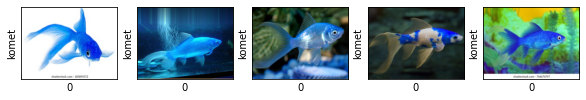

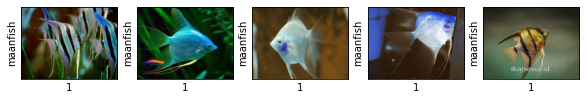

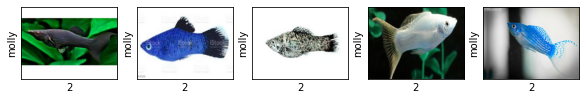

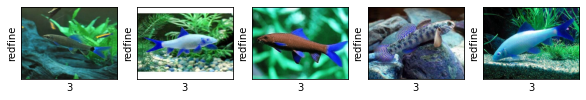

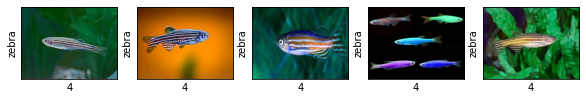

In [25]:
class_names = ['komet', 'maanfish','molly','redfine','zebra']
plt.figure(figsize=(10,10))
for i in range(5):
 plt.subplot(1,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(komet[i], cmap=plt.cm.binary)
 plt.xlabel(label_komet[i])
 plt.ylabel(class_names[0])
plt.show()
plt.figure(figsize=(10,10))
for i in range(5):
 plt.subplot(2,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(maanfish[i], cmap=plt.cm.binary)
 plt.xlabel(label_maanfish[i])
 plt.ylabel(class_names[1])
plt.show()
plt.figure(figsize=(10,10))
for i in range(5):
 plt.subplot(3,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(molly[i], cmap=plt.cm.binary)
 plt.xlabel(label_molly[i])
 plt.ylabel(class_names[2])
plt.show()
plt.figure(figsize=(10,10))
for i in range(5):
 plt.subplot(4,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(redfine[i], cmap=plt.cm.binary)
 plt.xlabel(label_redfine[i])
 plt.ylabel(class_names[3])
plt.show()
plt.figure(figsize=(10,10))
for i in range(5):
 plt.subplot(5,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(zebra[i], cmap=plt.cm.binary)
 plt.xlabel(label_zebra[i])
 plt.ylabel(class_names[4])
plt.show()


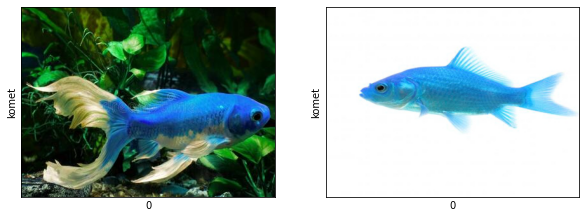

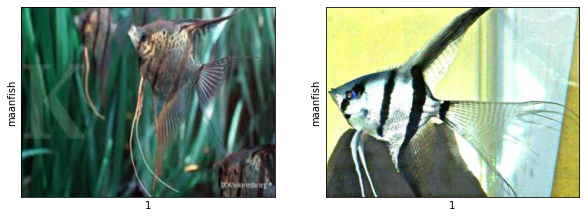

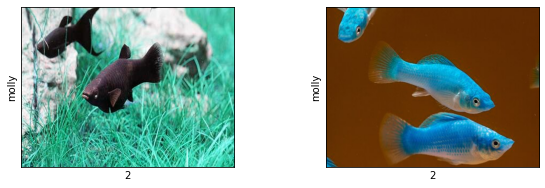

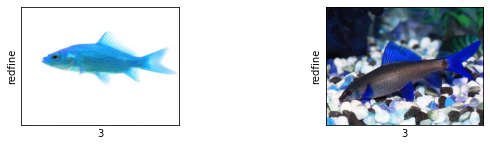

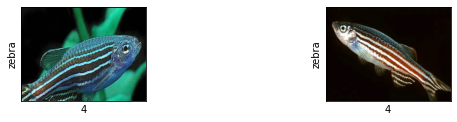

In [26]:
class_names = ['komet', 'maanfish','molly','redfine','zebra']
plt.figure(figsize=(10,10))
for i in range(2):
 plt.subplot(1,2,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(komet_uji[i], cmap=plt.cm.binary)
 plt.xlabel(label_komet_uji[i])
 plt.ylabel(class_names[0])
plt.show()
plt.figure(figsize=(10,10))
for i in range(2):
 plt.subplot(2,2,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(maanfish_uji[i], cmap=plt.cm.binary)
 plt.xlabel(label_maanfish_uji[i])
 plt.ylabel(class_names[1])
plt.show()
plt.figure(figsize=(10,10))
for i in range(2):
 plt.subplot(3,2,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(molly_uji[i], cmap=plt.cm.binary)
 plt.xlabel(label_molly_uji[i])
 plt.ylabel(class_names[2])
plt.show()
plt.figure(figsize=(10,10))
for i in range(2):
 plt.subplot(4,2,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(redfine_uji[i], cmap=plt.cm.binary)
 plt.xlabel(label_redfine_uji[i])
 plt.ylabel(class_names[3])
plt.show()
plt.figure(figsize=(10,10))
for i in range(2):
 plt.subplot(5,2,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(zebra_uji[i], cmap=plt.cm.binary)
 plt.xlabel(label_zebra_uji[i])
 plt.ylabel(class_names[4])
plt.show()


In [27]:
model = models.Sequential()
model.add(layers.Conv2D(100, (3, 3), activation='relu', input_shape=(300, 400, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 398, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 199, 100)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 197, 200)     180200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 98, 200)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 96, 200)       360200    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 48, 200)      0

In [29]:
model.add(layers.Flatten())
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(5))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 398, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 199, 100)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 197, 200)     180200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 98, 200)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 96, 200)       360200    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 48, 200)      0

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(X,y, epochs=10,
                    validation_data=(X_uji, y_uji))

Epoch 1/10
1/1 [==============================] - 61s 61s/step - loss: 1.6090 - accuracy: 0.2000 - val_loss: 2.8009 - val_accuracy: 0.2000
Epoch 2/10
1/1 [==============================] - 36s 36s/step - loss: 2.1441 - accuracy: 0.2000 - val_loss: 1.8735 - val_accuracy: 0.2000
Epoch 3/10
1/1 [==============================] - 38s 38s/step - loss: 1.8096 - accuracy: 0.2000 - val_loss: 1.6110 - val_accuracy: 0.2000
Epoch 4/10
1/1 [==============================] - 40s 40s/step - loss: 1.5749 - accuracy: 0.2800 - val_loss: 1.5878 - val_accuracy: 0.3000
Epoch 5/10
1/1 [==============================] - 42s 42s/step - loss: 1.5225 - accuracy: 0.6000 - val_loss: 1.5534 - val_accuracy: 0.4000
Epoch 6/10
1/1 [==============================] - 42s 42s/step - loss: 1.3844 - accuracy: 0.6400 - val_loss: 1.5573 - val_accuracy: 0.4000
Epoch 7/10
1/1 [==============================] - 43s 43s/step - loss: 1.1456 - accuracy: 0.5600 - val_loss: 2.9882 - val_accuracy: 0.2000
Epoch 8/10
1/1 [===========

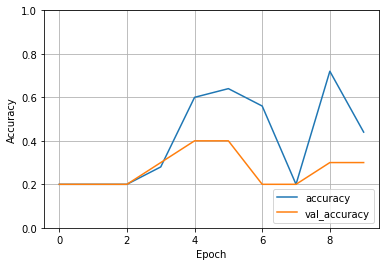

In [32]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.grid()

In [33]:
# Evaluasi modelnya
test_loss, test_acc = model.evaluate(X_uji, y_uji, verbose=2)
# Tampilkan hasil tes akurasi
print('Hasil akurasi pengujian =',test_acc)

1/1 - 5s - loss: 1.6896 - accuracy: 0.3000 - 5s/epoch - 5s/step
Hasil akurasi pengujian = 0.30000001192092896


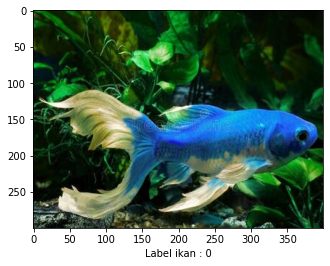

Hasil prediksi model: 0


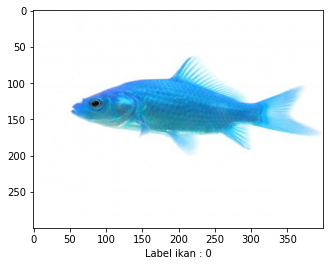

Hasil prediksi model: 0


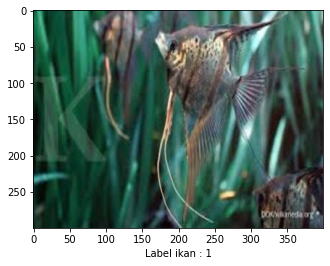

Hasil prediksi model: 3


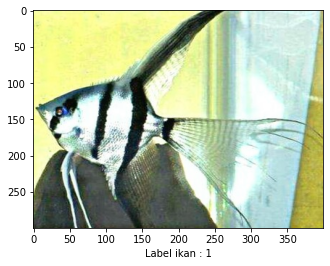

Hasil prediksi model: 3


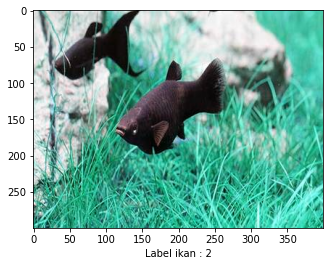

Hasil prediksi model: 3


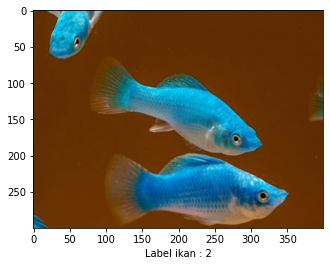

Hasil prediksi model: 0


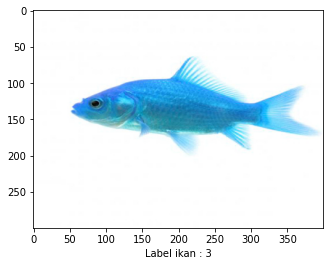

Hasil prediksi model: 0


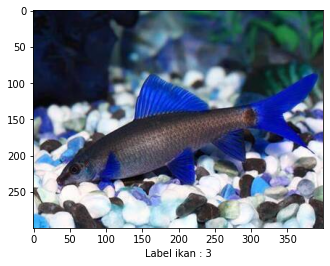

Hasil prediksi model: 3


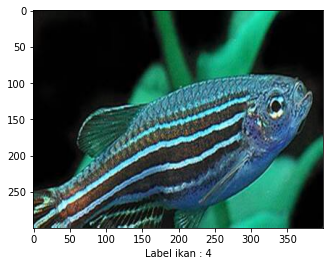

Hasil prediksi model: 0


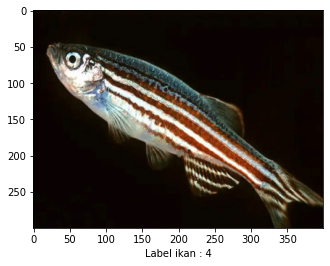

Hasil prediksi model: 2


In [34]:
# Visualisasikan hasil prediksi pengenalan ikan.
import matplotlib.pyplot as plt
# Memprediksi 50 gambar dari Data Uji.
n_images = 10
test_images = X_uji[:n_images]
test_label = y_uji[:n_images]
predictions = model.predict(test_images)
# Menampilkan gambar dan prediksi model.
for i in range(n_images):
 plt.imshow(test_images[i])
 plt.xlabel("Label ikan : %i" % test_label[i])
 plt.show()
 print("Hasil prediksi model: %i" % np.argmax(predictions[i]))